In [146]:
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# Apparatus dimensions
d = 0.01
ID = 0.02
OD = 0.08

# Speed of light
c = 299792458

# Permittivity and permeability of air
epsilon_air = 1
mu_air = 1

# Cut of wavelength of coaxial tube #There is no cut off
lambda_c = np.pi * (OD - ID)/2 * np.sqrt(epsilon_air * mu_air)

The following analysis uses Modern ferrites: Vol. 1, Chapter 7.3.1.1, Pages 167-168

In [148]:
# A function to calculate epsilon and mu from the data
def calculate(filename, int):  
    # Read the data from the text file
    data = np.loadtxt(filename, skiprows=5)
 
    # Extract the frequency and S-parameter values from the data
    frequency = data[:, 0]
    s11_mag = data[:, 1]
    s11_phase = data[:, 2]
    s21_mag = data[:, 3]
    s21_phase = data[:, 4]
    s12_mag = data[:, 5]
    s12_phase = data[:, 6]
    s22_mag = data[:, 7]
    s22_phase = data[:, 8]

    # Convert to complex s-parameters (DO WE NEED 10 or 20?)
    s11 = 10 ** (s11_mag / 10) * np.exp(1j * np.deg2rad(s11_phase))
    s21 = 10 ** (s21_mag / 10) * np.exp(1j * np.deg2rad(s21_phase))
    s12 = 10 ** (s12_mag / 10) * np.exp(1j * np.deg2rad(s12_phase))
    s22 = 10 ** (s22_mag / 10) * np.exp(1j * np.deg2rad(s22_phase))

    # Free space wavelength
    lambda_0 = c / frequency
    
    # Guided mode wavelength of the unfilled transmission line
    lambda_0g = lambda_0 / np.sqrt(epsilon_air * mu_air)

    # Calculate the reflection and transmission coefficients
    X = (1-(s11**2-s21**2))/(2*s11)
    R = X-np.sqrt(X**2-1)
    T = (s11+s21-R)/(1-(s11+s21)*R)
    L = 1/np.sqrt(-(1/(2*np.pi*d) * np.log(1/T)-int*np.pi*1j)**2)
    
    # Calculate the relative permittivity and permeability
    mu_r = lambda_0g/L * (1+R)/(1-R)
    epsilon_r = lambda_0**2 * (1/L**2 + 1/lambda_c**2)/mu_r
    
    return(frequency, epsilon_r, mu_r)

Calibration with no sample (air)

Average relative permittivity:  (114.00246776733275-0.030485197075300653j)
Average relative permeability:  (77.93800603725659-0.05767712294493681j)


C:\Users\bgladwyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


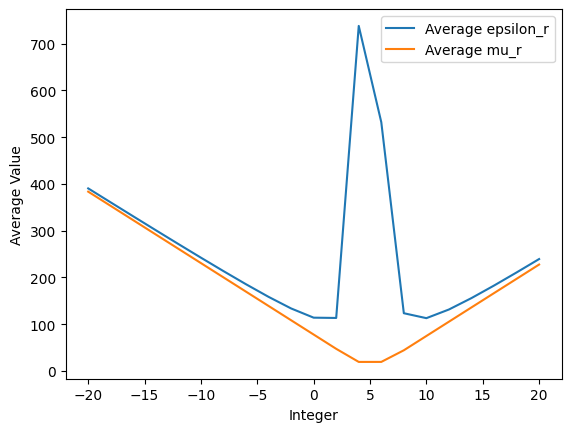

In [154]:
# Calculate baseline
frequency, baseline_epsilon, baseline_mu = calculate("NO_SAMPLE.S2P", 0)

# Print results
print("Average relative permittivity: " , np.average(baseline_epsilon))
print("Average relative permeability: " , np.average(baseline_mu))

integers = range(-20, 21, 2)
average_epsilon_r = []
average_mu_r = []

for integer in integers:
    frequency, epsilon_r, mu_r = calculate("NO_SAMPLE.S2P", integer)

    # Calculate the average values
    average_epsilon_r.append(np.mean(epsilon_r))
    average_mu_r.append(np.mean(mu_r))

# Plot average epsilon_r and average mu_r vs. integers
plt.plot(integers, average_epsilon_r, label='Average epsilon_r')
plt.plot(integers, average_mu_r, label='Average mu_r')
plt.xlabel('Integer')
plt.ylabel('Average Value')
plt.legend()

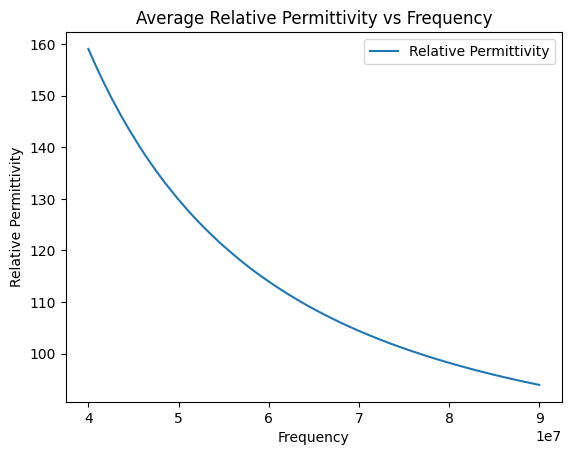

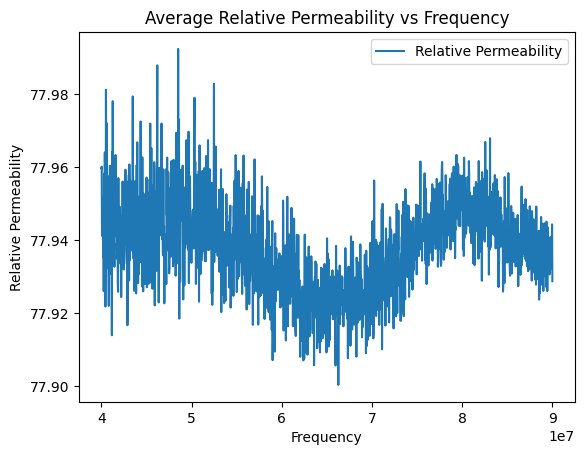

In [150]:
# Plotting the relative permittivity
plt.plot(frequency, baseline_epsilon, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, baseline_mu, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()

Macor Sample

In [151]:
# Calculate
frequency, macor_epsilon, macor_mu = calculate("macor_SAMPLE.S2P")

# Print results
print("Average relative permittivity: " , np.average(macor_epsilon)-np.average(baseline_epsilon))
print("Average relative permeability: " , np.average(macor_mu)-np.average(baseline_mu))

TypeError: calculate() missing 1 required positional argument: 'int'

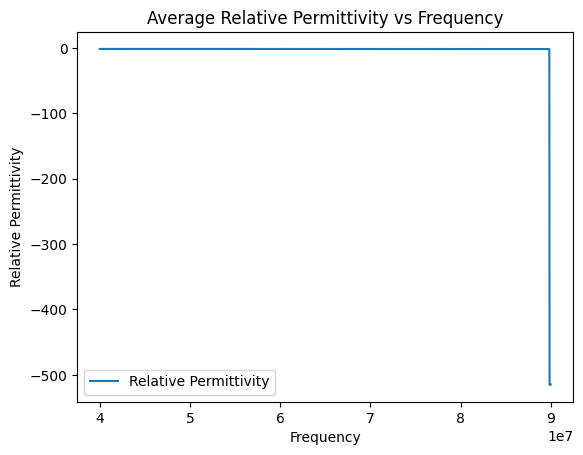

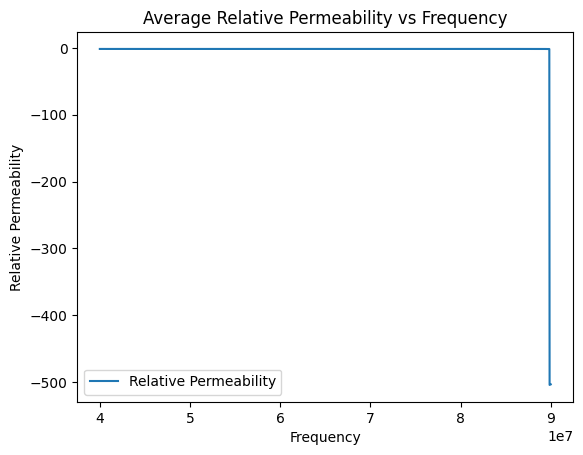

In [ ]:
# Plotting the relative permittivity
plt.plot(frequency, macor_epsilon-baseline_epsilon+1, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, macor_mu-baseline_mu+1, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()

ferrite Sample

In [ ]:
# Calculate
frequency, ferrite_epsilon, ferrite_mu = calculate("FERRITE_SAMPLE.S2P")

# Print results
print("Average relative permittivity: " , np.average(ferrite_epsilon)-np.average(baseline_epsilon)+1)
print("Average relative permeability: " , np.average(ferrite_mu)-np.average(baseline_mu)+1)

Average relative permittivity:  (-111.93775780790273+14.272048528296308j)
Average relative permeability:  (-98.69351163145592+15.418261688343383j)


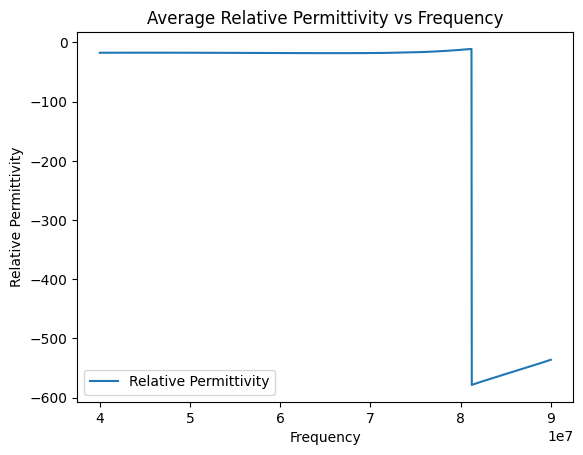

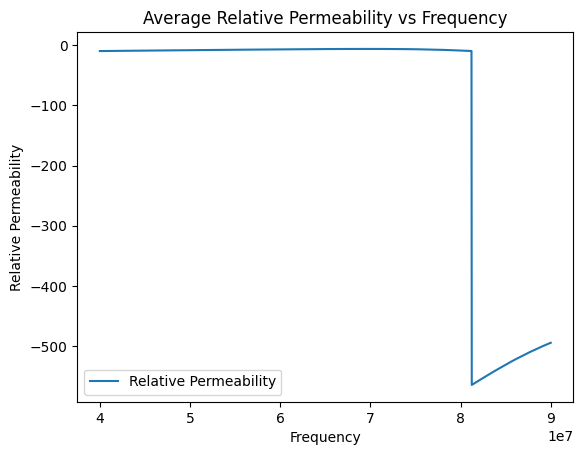

In [ ]:
# Plotting the relative permittivity
plt.plot(frequency, ferrite_epsilon-baseline_epsilon+1, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Average Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, ferrite_mu-baseline_mu+1, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Average Relative Permeability vs Frequency')
plt.legend()
plt.show()